In [23]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
DATAPATH  = r'/mnt/d/Projects/data'

train_file = os.path.join(DATAPATH, 'train.csv')

train = pd.read_csv(train_file)
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [25]:
train.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [26]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

assert set(train.columns.tolist()) == set(numerical_cols+categorical_cols)


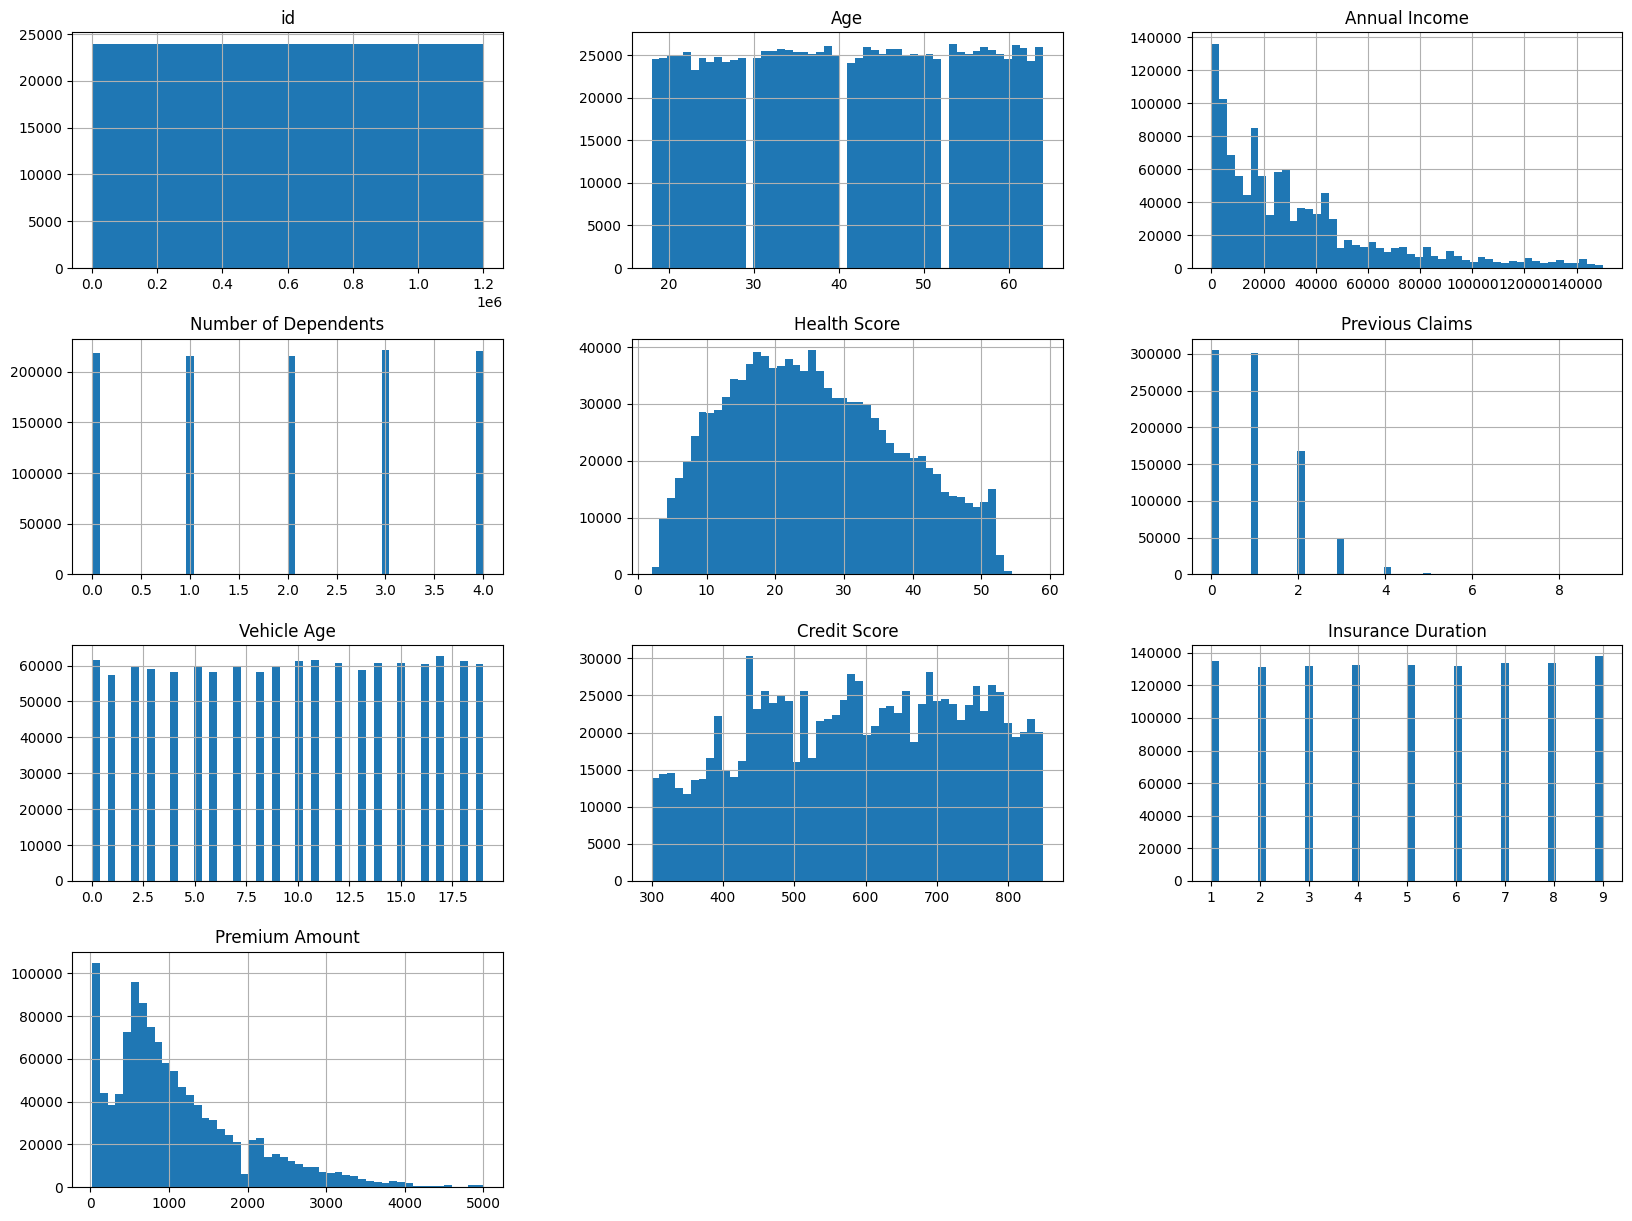

In [27]:
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

In [28]:
corr_matrix = train[numerical_cols].corr()

corr_matrix["Premium Amount"].sort_values(ascending=False)


strat_train_set, strat_test_set = train_test_split(
    train, test_size=0.2, random_state=242)

In [29]:
X_train = strat_train_set.drop("Premium Amount", axis=1)
y_train = strat_train_set["Premium Amount"]

X_test = strat_test_set.drop("Premium Amount", axis=1)
y_test = strat_test_set["Premium Amount"]

In [30]:
categorical_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))  # Use one-hot encoding
])

numerical_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

In [31]:
numerical_cols.remove('Premium Amount')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',categorical_pipeline, categorical_cols),
        ('num', numerical_pipeline, numerical_cols)
    ]
)


In [32]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor()),
])

In [33]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Marital Status',
                                                   'Education Level',
                                                   'Occupation', 'Location',
                                                   'Policy Type',
                                                   'Policy Start Date',
                                                   'Customer Feedback',
                                                   'Smoking Status',
                                                   'Exercise Frequency',
                                                   'Property Type']),
                                                 ('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['id', 'Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration'])])),
                ('model', GradientBoostingRegressor())])

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = pipeline.predict(X_test)


test_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Test MSE: {test_mse:.4f}")
print(f"R² Score: {r2:.4f}")

Test MSE: 730862.8283
R² Score: 0.0247


In [35]:

y_pred

array([1106.75556235, 1182.74520724,  863.94294711, ..., 1035.39459405,
       1163.74933908, 1181.37954555], shape=(240000,))

In [38]:
test_file = os.path.join(DATAPATH, 'test.csv')
submission_file = os.path.join(DATAPATH, 'submission.csv')
test_data = pd.read_csv(test_file)

# Step 2: Predict using the pipeline
# Assume the pipeline object has been trained and is named `pipeline`
# Make sure to preprocess the test data appropriately if needed
predictions = pipeline.predict(test_data)

# Step 3: Create the submission file
# Ensure the test file has an 'id' column
submission = pd.DataFrame({
    "id": test_data["id"],  # Replace 'id' with the correct column name if different
    "Premium Amount": predictions
})

# Step 4: Save the submission file
submission.to_csv(submission_file, index=False)